In [1]:
import os
import random
import sys
import shutil
import tqdm
import os # the main library for operating with folders and files
from shutil import copy2 # for copying file and its metadata to another location in the machine
import xml.etree.ElementTree as ET # for reading a Pascal VOC XML file
import scipy.io # for reading .mat file
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imgmp
import seaborn as sns
import timeit
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/projet7/utils.py'>

In [31]:
import os
import sys
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset/labels'):
    for filename in files:
        if filename.find('.xml') == -1:
            subdirectoryPath = os.path.relpath(subdir, 'annotations') #get the path to your subdirectory
            filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
            annotations.append(filePath.replace('..','.'))
print(len(annotations))
print(annotations)

20580
['./standford_dogs_dataset/labels/test/n02085620_11258.txt', './standford_dogs_dataset/labels/test/n02085620_11948.txt', './standford_dogs_dataset/labels/test/n02085620_1321.txt', './standford_dogs_dataset/labels/test/n02085620_14516.txt', './standford_dogs_dataset/labels/test/n02085620_1620.txt', './standford_dogs_dataset/labels/test/n02085620_2208.txt', './standford_dogs_dataset/labels/test/n02085620_3409.txt', './standford_dogs_dataset/labels/test/n02085620_3763.txt', './standford_dogs_dataset/labels/test/n02085620_3826.txt', './standford_dogs_dataset/labels/test/n02085620_3838.txt', './standford_dogs_dataset/labels/test/n02085620_3880.txt', './standford_dogs_dataset/labels/test/n02085620_4016.txt', './standford_dogs_dataset/labels/test/n02085620_4814.txt', './standford_dogs_dataset/labels/test/n02085620_4980.txt', './standford_dogs_dataset/labels/test/n02085620_7738.txt', './standford_dogs_dataset/labels/test/n02085782_1434.txt', './standford_dogs_dataset/labels/test/n0208578

In [23]:
pwd

'/media/ismail/Elements/formation/projet7'

In [10]:
dogs_list = ['affenpinscher','Afghan_hound','African_hunting_dog','Airedale','American_Staffordshire_terrier','Appenzeller','Australian_terrier','basenji','basset','beagle','Bedlington_terrier','Bernese_mountain_dog','black-and-tan_coonhound','Blenheim_spaniel','bloodhound','bluetick','Border_collie','Border_terrier','borzoi','Boston_bull','Bouvier_des_Flandres','boxer','Brabancon_griffon','briard','Brittany_spaniel','bull_mastiff','cairn','Cardigan','Chesapeake_Bay_retriever','Chihuahua','chow','clumber','cocker_spaniel','collie','Rottweiler','Saint_Bernard','Saluki','Samoyed','schipperke','Scotch_terrier','Scottish_deerhound','Sealyham_terrier','Shetland_sheepdog','Shih-Tzu','Siberian_husky','silky_terrier','soft-coated_wheaten_terrier','Staffordshire_bullterrier','standard_poodle','standard_schnauzer','Sussex_spaniel','Tibetan_mastiff','Tibetan_terrier','toy_poodle','toy_terrier','vizsla','Walker_hound','Weimaraner','Welsh_springer_spaniel','West_Highland_white_terrier','whippet','wire-haired_fox_terrier','Yorkshire_terrier','Dandie_Dinmont','dhole','dingo','Doberman','English_foxhound','English_setter','English_springer','EntleBucher','Eskimo_dog','flat-coated_retriever','French_bulldog','German_shepherd','German_short-haired_pointer','giant_schnauzer','golden_retriever','Gordon_setter','Greater_Swiss_Mountain_dog','Great_Dane','Great_Pyrenees','groenendael','Irish_setter','Irish_terrier','Irish_water_spaniel','Irish_wolfhound','Italian_greyhound','Japanese_spaniel','keeshond','kelpie','Kerry_blue_terrier','komondor','kuvasz','Labrador_retriever','Lakeland_terrier','Leonberg','Lhasa','malamute','malinois','Maltese_dog','Mexican_hairless','miniature_pinscher','miniature_poodle','miniature_schnauzer','curly-coated_retriever','Ibizan_hound','Newfoundland','Rhodesian_ridgeback','Norfolk_terrier','Norwegian_elkhound','Norwich_terrier','Old_English_sheepdog','otterhound','papillon','Pekinese','Pembroke','Pomeranian','pug','redbone']
class_name_to_id_mapping = {}
for i, elem in enumerate(dogs_list):
    class_name_to_id_mapping[elem] = i
print(class_name_to_id_mapping)

{'affenpinscher': 0, 'Afghan_hound': 1, 'African_hunting_dog': 2, 'Airedale': 3, 'American_Staffordshire_terrier': 4, 'Appenzeller': 5, 'Australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'Bedlington_terrier': 10, 'Bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'Blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'Border_collie': 16, 'Border_terrier': 17, 'borzoi': 18, 'Boston_bull': 19, 'Bouvier_des_Flandres': 20, 'boxer': 21, 'Brabancon_griffon': 22, 'briard': 23, 'Brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'Cardigan': 27, 'Chesapeake_Bay_retriever': 28, 'Chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'Rottweiler': 34, 'Saint_Bernard': 35, 'Saluki': 36, 'Samoyed': 37, 'schipperke': 38, 'Scotch_terrier': 39, 'Scottish_deerhound': 40, 'Sealyham_terrier': 41, 'Shetland_sheepdog': 42, 'Shih-Tzu': 43, 'Siberian_husky': 44, 'silky_terrier': 45, 'soft-coated_wheaten_terrier': 46, 'Staffordshire_bullterrier': 47, 'stan

In [11]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

./standford_dogs_dataset/images/train/n02107312_6275.jpg ./standford_dogs_dataset/images/train/n02107312_6275.jpg


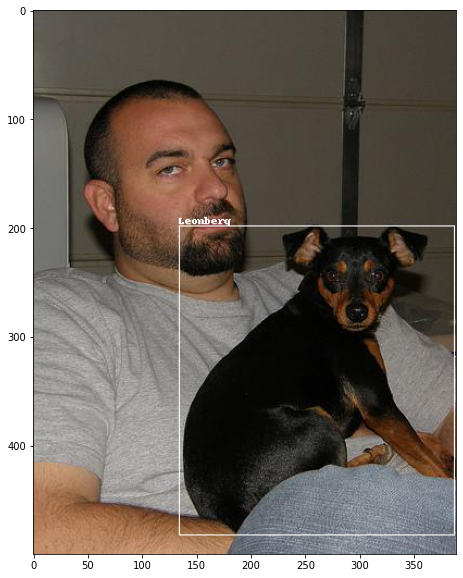

In [43]:
import matplotlib.image as imgmp

random.seed(8)
# Get any random annotation file 
fig = plt.figure(figsize=(10,10))
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

./standford_dogs_dataset/labels/train/n02088094_1357.txt
./standford_dogs_dataset/images/train/n02088094_1357.jpg ./standford_dogs_dataset/images/train/n02088094_1357.jpg


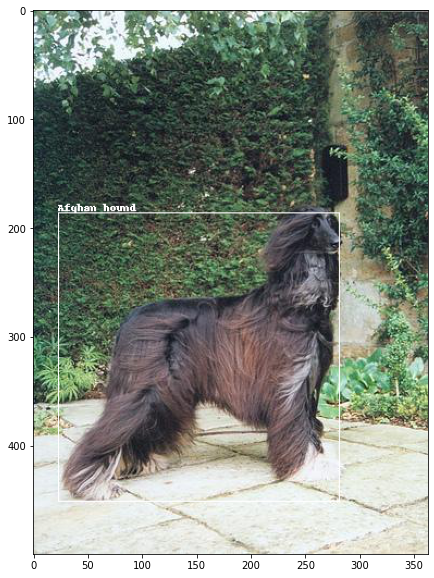

In [45]:
import matplotlib.image as imgmp

random.seed(100)
fig = plt.figure(figsize=(10,10))
# Get any random annotation file 
annotation_file = random.choice(annotations)
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [18]:
img = cv.imread('./standford_dogs_dataset/images/train/n02088094_1357.jpg')
img_width = 363
img_height = 500
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# Resize image
dim = (img_width, img_height)
img_result = cv.resize(img, dim, interpolation=cv.INTER_LINEAR)
# Equalization
img_yuv = cv.cvtColor(img_result,cv.COLOR_BGR2YUV)
img_equ = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
dst_img = cv.fastNlMeansDenoisingColored(
    src=img_equ,
    dst=None,
    h=10,
    hColor=10,
    templateWindowSize=7,
    searchWindowSize=21)

cv.imwrite('./testimage/test.jpg', dst_img) 

True

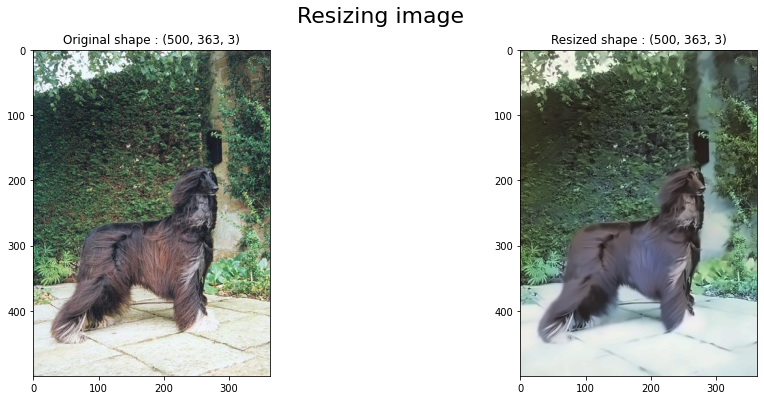

In [19]:

fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original shape : {}".format(img.shape))
plt.subplot(1, 2, 2)
plt.imshow(dst_img)
plt.title("Resized shape : {}".format(dst_img.shape))
plt.suptitle("Resizing image",
             color="black", 
             fontsize=22, y=.98)
plt.show()

./testimage/test.txt
./testimage/test.jpg ./testimage/test.jpg


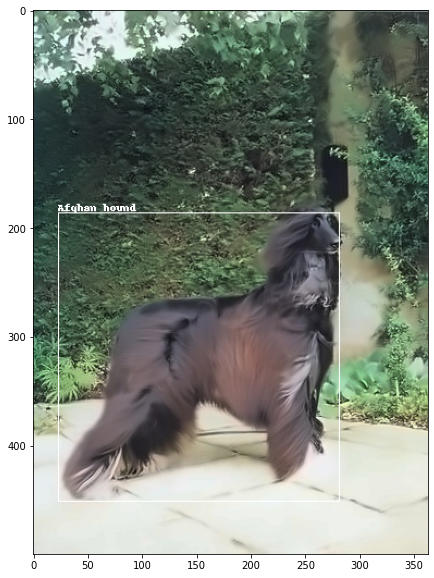

In [20]:
import matplotlib.image as imgmp

random.seed(100)
fig = plt.figure(figsize=(10,10))
# Get any random annotation file 
annotation_file = './testimage/test.txt'
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)